# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_fixed = city.replace(" ","%20")
    
    city_url = f"{url}q={city_fixed}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city} | {city_url}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()
        
        # Parse the JSON and retrieve data
        city_weather = response['main']['temp']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora | http://api.openweathermap.org/data/2.5/weather?q=puerto%20ayora&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 2 of Set 1 | weno | http://api.openweathermap.org/data/2.5/weather?q=weno&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 3 of Set 1 | muzaffargarh | http://api.openweathermap.org/data/2.5/weather?q=muzaffargarh&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 4 of Set 1 | albany | http://api.openweathermap.org/data/2.5/weather?q=albany&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 5 of Set 1 | adamstown | http://api.openweathermap.org/data/2.5/weather?q=adamstown&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 6 of Set 1 | new norfolk | http://api.openweathermap.org/data/2.5/weather?q=new%20norfolk&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing R

Processing Record 2 of Set 2 | dingtao | http://api.openweathermap.org/data/2.5/weather?q=dingtao&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 3 of Set 2 | taiohae | http://api.openweathermap.org/data/2.5/weather?q=taiohae&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
City not found. Skipping...
Processing Record 4 of Set 2 | undurkhaan | http://api.openweathermap.org/data/2.5/weather?q=undurkhaan&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 5 of Set 2 | at taj | http://api.openweathermap.org/data/2.5/weather?q=at%20taj&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 6 of Set 2 | carmagnola | http://api.openweathermap.org/data/2.5/weather?q=carmagnola&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 7 of Set 2 | vila velha | http://api.openweathermap.org/data/2.5/weather?q=vila%20velha&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 8 of Set 2 | sao vicente | http://

Processing Record 5 of Set 3 | st. john's | http://api.openweathermap.org/data/2.5/weather?q=st.%20john's&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 6 of Set 3 | cheraw | http://api.openweathermap.org/data/2.5/weather?q=cheraw&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 7 of Set 3 | bethel | http://api.openweathermap.org/data/2.5/weather?q=bethel&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 8 of Set 3 | sitka | http://api.openweathermap.org/data/2.5/weather?q=sitka&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 9 of Set 3 | haiku-pauwela | http://api.openweathermap.org/data/2.5/weather?q=haiku-pauwela&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 10 of Set 3 | selfoss | http://api.openweathermap.org/data/2.5/weather?q=selfoss&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 11 of Set 3 | ocean city | http://api.openweathermap.org/data/2.5/wea

Processing Record 9 of Set 4 | punta arenas | http://api.openweathermap.org/data/2.5/weather?q=punta%20arenas&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 10 of Set 4 | antofagasta | http://api.openweathermap.org/data/2.5/weather?q=antofagasta&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 11 of Set 4 | rio segundo | http://api.openweathermap.org/data/2.5/weather?q=rio%20segundo&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 12 of Set 4 | eyl | http://api.openweathermap.org/data/2.5/weather?q=eyl&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 13 of Set 4 | prado | http://api.openweathermap.org/data/2.5/weather?q=prado&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 14 of Set 4 | igarka | http://api.openweathermap.org/data/2.5/weather?q=igarka&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 15 of Set 4 | port elizabeth | http://api.openweathermap.org/

Processing Record 12 of Set 5 | kigoma | http://api.openweathermap.org/data/2.5/weather?q=kigoma&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 13 of Set 5 | murghob | http://api.openweathermap.org/data/2.5/weather?q=murghob&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 14 of Set 5 | broken hill | http://api.openweathermap.org/data/2.5/weather?q=broken%20hill&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 15 of Set 5 | tiksi | http://api.openweathermap.org/data/2.5/weather?q=tiksi&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 16 of Set 5 | la peca | http://api.openweathermap.org/data/2.5/weather?q=la%20peca&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 17 of Set 5 | souillac | http://api.openweathermap.org/data/2.5/weather?q=souillac&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 18 of Set 5 | hadibu | http://api.openweathermap.org/data/2.5/weathe

Processing Record 14 of Set 6 | opuwo | http://api.openweathermap.org/data/2.5/weather?q=opuwo&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 15 of Set 6 | katiola | http://api.openweathermap.org/data/2.5/weather?q=katiola&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 16 of Set 6 | bungo-takada-shi | http://api.openweathermap.org/data/2.5/weather?q=bungo-takada-shi&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 17 of Set 6 | ulsteinvik | http://api.openweathermap.org/data/2.5/weather?q=ulsteinvik&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 18 of Set 6 | polyarnyy | http://api.openweathermap.org/data/2.5/weather?q=polyarnyy&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 19 of Set 6 | road town | http://api.openweathermap.org/data/2.5/weather?q=road%20town&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 20 of Set 6 | dryden | http://api.openweatherm

Processing Record 17 of Set 7 | georgetown | http://api.openweathermap.org/data/2.5/weather?q=georgetown&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 18 of Set 7 | dzhalagash | http://api.openweathermap.org/data/2.5/weather?q=dzhalagash&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 19 of Set 7 | ocos | http://api.openweathermap.org/data/2.5/weather?q=ocos&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 20 of Set 7 | shats'k | http://api.openweathermap.org/data/2.5/weather?q=shats'k&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 21 of Set 7 | hami | http://api.openweathermap.org/data/2.5/weather?q=hami&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 22 of Set 7 | saipan | http://api.openweathermap.org/data/2.5/weather?q=saipan&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 23 of Set 7 | mhamid | http://api.openweathermap.org/data/2.5/weather?q=mhamid

Processing Record 20 of Set 8 | gaiman | http://api.openweathermap.org/data/2.5/weather?q=gaiman&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 21 of Set 8 | tamandare | http://api.openweathermap.org/data/2.5/weather?q=tamandare&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 22 of Set 8 | hengchun | http://api.openweathermap.org/data/2.5/weather?q=hengchun&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 23 of Set 8 | mugia | http://api.openweathermap.org/data/2.5/weather?q=mugia&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 24 of Set 8 | kavaratti | http://api.openweathermap.org/data/2.5/weather?q=kavaratti&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 25 of Set 8 | coahuayana de hidalgo | http://api.openweathermap.org/data/2.5/weather?q=coahuayana%20de%20hidalgo&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 26 of Set 8 | yerofey pavlovich | http:/

Processing Record 23 of Set 9 | espoo | http://api.openweathermap.org/data/2.5/weather?q=espoo&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 24 of Set 9 | mersa matruh | http://api.openweathermap.org/data/2.5/weather?q=mersa%20matruh&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 25 of Set 9 | greenville | http://api.openweathermap.org/data/2.5/weather?q=greenville&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 26 of Set 9 | san julian | http://api.openweathermap.org/data/2.5/weather?q=san%20julian&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 27 of Set 9 | malkara | http://api.openweathermap.org/data/2.5/weather?q=malkara&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 28 of Set 9 | ayora | http://api.openweathermap.org/data/2.5/weather?q=ayora&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 29 of Set 9 | angelholm | http://api.openweathermap.org/da

Processing Record 26 of Set 10 | labrador city | http://api.openweathermap.org/data/2.5/weather?q=labrador%20city&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 27 of Set 10 | guerrero negro | http://api.openweathermap.org/data/2.5/weather?q=guerrero%20negro&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 28 of Set 10 | mount isa | http://api.openweathermap.org/data/2.5/weather?q=mount%20isa&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 29 of Set 10 | preobrazheniye | http://api.openweathermap.org/data/2.5/weather?q=preobrazheniye&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 30 of Set 10 | sao jose da coroa grande | http://api.openweathermap.org/data/2.5/weather?q=sao%20jose%20da%20coroa%20grande&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 31 of Set 10 | flying fish cove | http://api.openweathermap.org/data/2.5/weather?q=flying%20fish%20cove&appid=870b9d75963e6e9db8cb

Processing Record 28 of Set 11 | thulamahashi | http://api.openweathermap.org/data/2.5/weather?q=thulamahashi&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 29 of Set 11 | barkhera kalan | http://api.openweathermap.org/data/2.5/weather?q=barkhera%20kalan&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 30 of Set 11 | mariental | http://api.openweathermap.org/data/2.5/weather?q=mariental&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 31 of Set 11 | praia | http://api.openweathermap.org/data/2.5/weather?q=praia&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 32 of Set 11 | eydhafushi | http://api.openweathermap.org/data/2.5/weather?q=eydhafushi&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 33 of Set 11 | ceeldheer | http://api.openweathermap.org/data/2.5/weather?q=ceeldheer&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 34 of Set 11 | takamaka | http://a

Processing Record 30 of Set 12 | mindelo | http://api.openweathermap.org/data/2.5/weather?q=mindelo&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 31 of Set 12 | mount gambier | http://api.openweathermap.org/data/2.5/weather?q=mount%20gambier&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 32 of Set 12 | vila do maio | http://api.openweathermap.org/data/2.5/weather?q=vila%20do%20maio&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 33 of Set 12 | ulanhot | http://api.openweathermap.org/data/2.5/weather?q=ulanhot&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 34 of Set 12 | zyryanskoye | http://api.openweathermap.org/data/2.5/weather?q=zyryanskoye&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 35 of Set 12 | shimokizukuri | http://api.openweathermap.org/data/2.5/weather?q=shimokizukuri&appid=870b9d75963e6e9db8cb7ba42b55a731&units=metric
Processing Record 36 of Set 12 | remire-

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,28.98,87,64,2.24,EC,1689287432
1,weno,7.4515,151.8468,28.58,75,69,5.46,FM,1689287203
2,muzaffargarh,30.0754,71.1921,33.01,34,0,5.04,PK,1689287485
3,albany,42.6001,-73.9662,28.43,94,68,1.04,US,1689287731
4,adamstown,-25.0660,-130.1015,21.16,77,1,2.75,PN,1689287794


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.98,87,64,2.24,EC,1689287432
1,weno,7.4515,151.8468,28.58,75,69,5.46,FM,1689287203
2,muzaffargarh,30.0754,71.1921,33.01,34,0,5.04,PK,1689287485
3,albany,42.6001,-73.9662,28.43,94,68,1.04,US,1689287731
4,adamstown,-25.0660,-130.1015,21.16,77,1,2.75,PN,1689287794


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

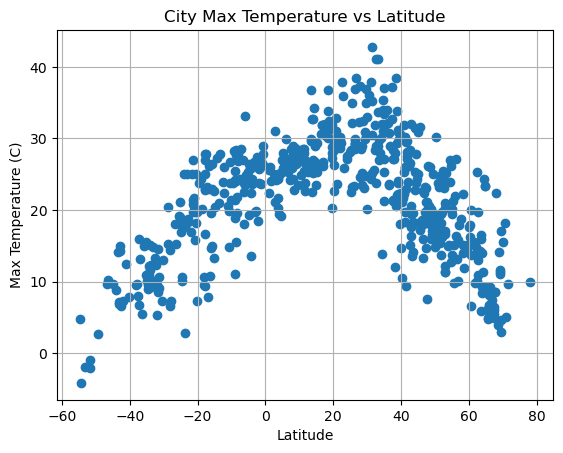

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

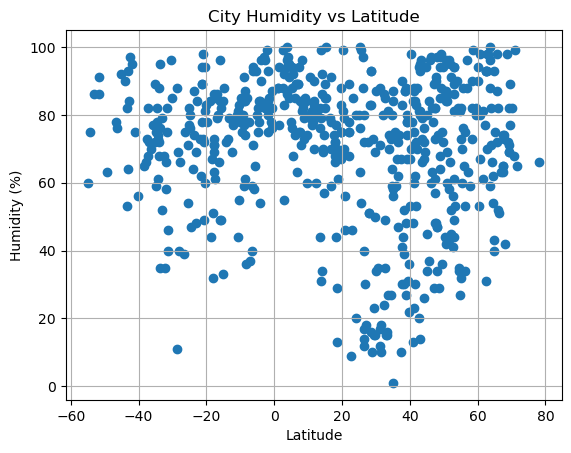

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

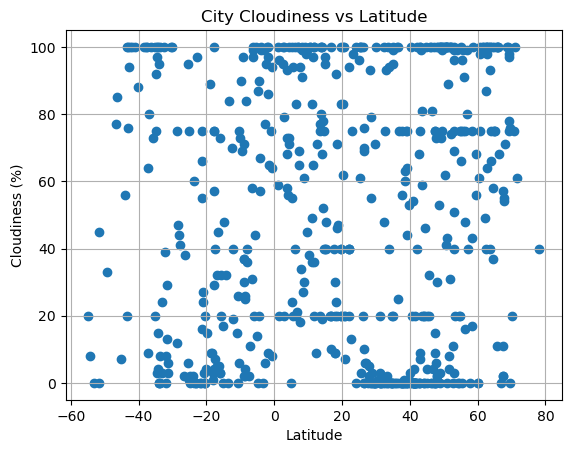

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

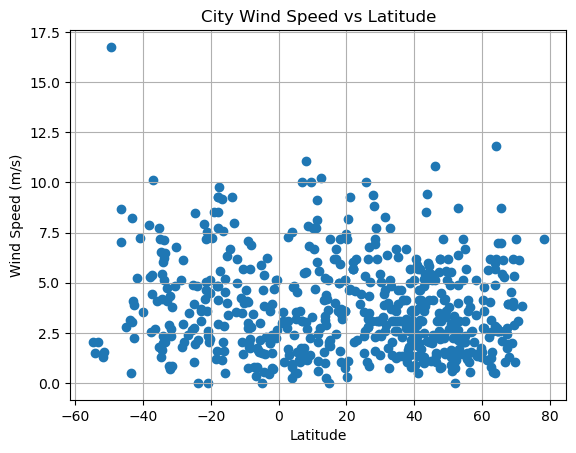

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [165]:
# Define a function to create Linear Regression plots
## x- and y-axis values should be series/columns

def f(x,y):
    regression = linregress(x,y)
    r = regression.rvalue
    i = round(regression.intercept,2)
    s = round(regression.slope,2)
    
    x_min = x.min() + 1
    y_min = y.min() + 1
    
    print(f"The r value is {r}")
    
    text_kwargs = dict(ha = 'left', va = 'bottom', fontsize=17, color='r')
    plt.text(x_min,y_min,f"y = {s}x + {i}",**text_kwargs, horizontalalignment='center', verticalalignment='center')
    
    plt.scatter(x,y)

    plt.plot(x, i + (s * x),'r')
    
    plt.show()


In [166]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,weno,7.4515,151.8468,28.58,75,69,5.46,FM,1689287203
2,muzaffargarh,30.0754,71.1921,33.01,34,0,5.04,PK,1689287485
3,albany,42.6001,-73.9662,28.43,94,68,1.04,US,1689287731
6,college,64.8569,-147.8028,23.37,43,75,2.57,US,1689287767
8,troitskoye,52.9821,84.6757,20.28,61,69,2.64,RU,1689287795


In [167]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.98,87,64,2.24,EC,1689287432
4,adamstown,-25.0660,-130.1015,21.16,77,1,2.75,PN,1689287794
5,new norfolk,-42.7826,147.0587,14.95,84,94,3.88,AU,1689287794
7,whangarei,-35.7317,174.3239,14.97,77,73,4.07,NZ,1689287718
10,paracuru,-3.4100,-39.0306,26.73,83,0,6.23,BR,1689287795


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.651106993434757


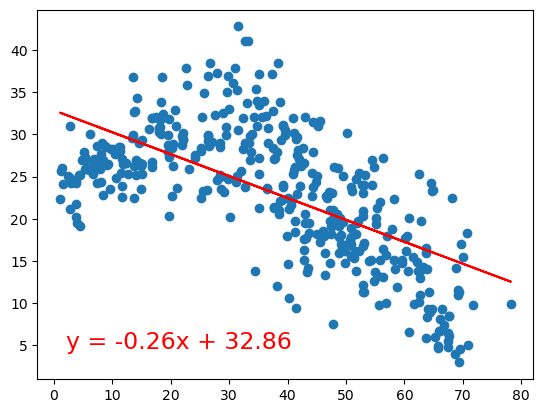

In [169]:
# Linear regression on Northern Hemisphere

f(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])


The r value is 0.7976311871934826


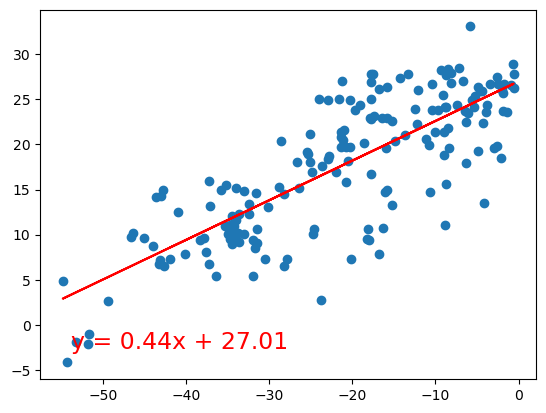

In [170]:
# Linear regression on Southern Hemisphere

f(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])


**Discussion about the linear relationship:** Both plots and regression lines show a relatively strong positive correlation between distance from the equator and temperature. The northern hemisphere data shows a slightly weaker correleation / r value and a flatter slope, while also including many more data points (cities) both close to the equator and very far from the equator, which could be part of the reason for both those differences.

### Humidity vs. Latitude Linear Regression Plot

The r value is -0.06140217568964207


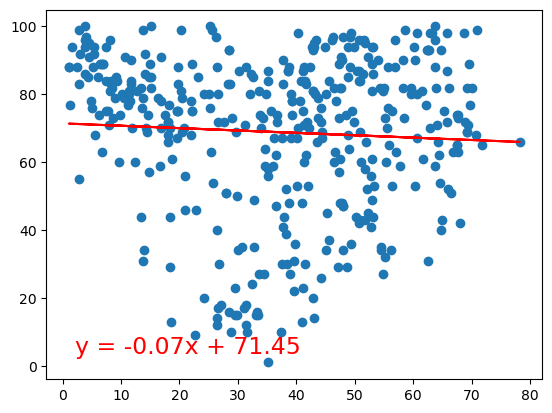

In [171]:
# Northern Hemisphere

f(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])


The r value is 0.0933187807175873


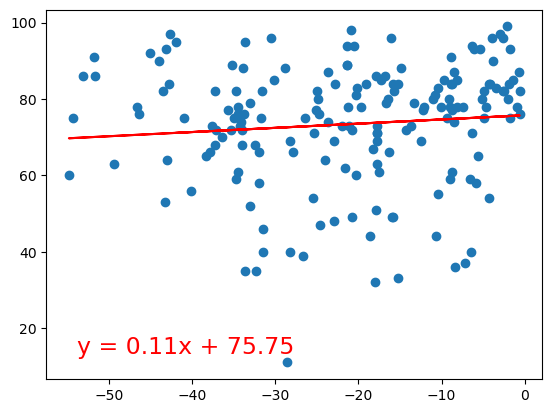

In [172]:
# Southern Hemisphere

f(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])


**Discussion about the linear relationship:** Unlike the relationship between temperature and latitude, the relationship between humidity and latitude does not show any meaningful correlation in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.01505514005759416


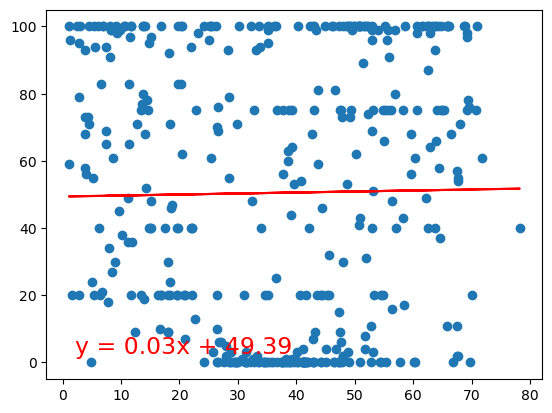

In [174]:
# Northern Hemisphere

f(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])


The r value is -0.001976773459594881


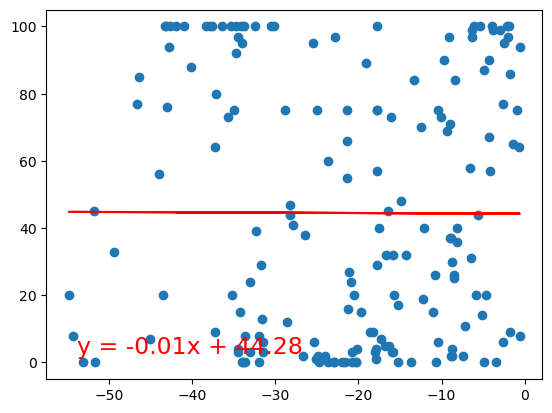

In [175]:
# Southern Hemisphere

f(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])


**Discussion about the linear relationship:** Unlike the relationship between temperature and latitude, the relationship between cloudiness and latitude does not show any meaningful correlation in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.06612556251001155


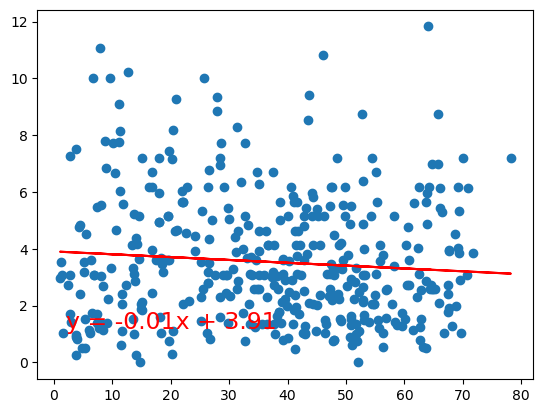

In [176]:
# Northern Hemisphere

f(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])


The r value is -0.1763448284922722


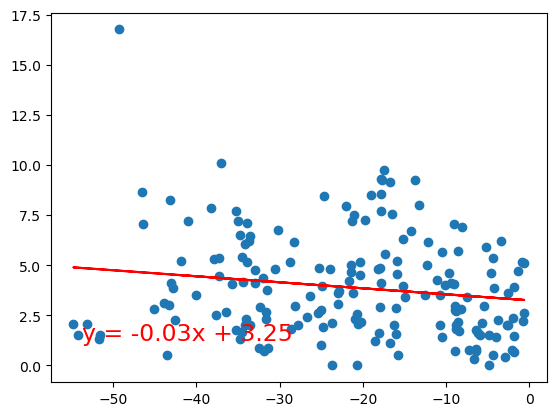

In [177]:
# Southern Hemisphere

f(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])


**Discussion about the linear relationship:** Unlike the relationship between temperature and latitude, the relationship between wind speed and latitude does not show any meaningful correlation in either hemisphere.